<a href="https://colab.research.google.com/github/JihanCalvinSong/GreenBayPackers/blob/main/GreenBayPackers_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Green Bay Packers Defense Analysis (2023-24) by Jihan Song

This notebook is designed to explore descriptive statistics of the Green Bay Packers Defense (2023-24) focused on its run defense and provide the visualization. The data used could be found here:

https://github.com/JihanCalvinSong/GreenBayPackers/blob/main/play_by_play_2023.csv

https://github.com/JihanCalvinSong/GreenBayPackers/blob/main/nfl_teams.csv

## 1. Data Import and Trasnformation

In [194]:
#@title imports | double-click here to show/hide the code

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [195]:
#@title data import and transformation | double-click here to show/hide the code

url = 'https://github.com/JihanCalvinSong/GreenBayPackers/blob/main/play_by_play_2023.csv?raw=true'
pbp = pd.read_csv(url, index_col = 0) # play_by_play data for every match in 2023-24
pbp_clean = pbp[['game_id','season_type','posteam','defteam',
              'down','ydstogo','yards_gained','play_type',
              'qb_scramble','run_location','run_gap','solo_tackle',
              'tackled_for_loss','touchdown','fumble','sack','incomplete_pass',
              'interception','lateral_rush','rusher_player_name',
              'solo_tackle_1_player_name']]

# filter season to regular only & play_type as run or pass only
play = ['run','pass']
pbp_clean = pbp_clean[(pbp_clean['season_type']=='REG') &
                      pbp_clean['play_type'].isin(play)]
# drop rows with NA values only for essentials
pbp_clean.dropna(subset = ['ydstogo','yards_gained','play_type'], inplace=True)
# qb scramble and fumble to integer
pbp_clean = pbp_clean.fillna(0)

pbp_clean[['down', 'qb_scramble','sack',
           'fumble','lateral_rush','interception',
           'touchdown','tackled_for_loss'
           ]] = pbp_clean[['down', 'qb_scramble','sack','fumble',
                           'lateral_rush','interception','touchdown',
                           'tackled_for_loss']].astype(int)
# quick look
pbp_clean.head(10)

<ipython-input-195-e8b84f08a2d1>:4: DtypeWarning:

Columns (45,179,180,182,183,189,190,197,198,203,204,205,206,218,219,220,222,224,226,253,254,255,260,262,263,283,284,332) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-195-e8b84f08a2d1>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,game_id,season_type,posteam,defteam,down,ydstogo,yards_gained,play_type,qb_scramble,run_location,...,solo_tackle,tackled_for_loss,touchdown,fumble,sack,incomplete_pass,interception,lateral_rush,rusher_player_name,solo_tackle_1_player_name
play_id,,,,,,,,,,,,,,,,,,,,,
55,2023_01_ARI_WAS,REG,WAS,ARI,1,10,3.0,run,0,right,...,1.0,0,0,0,0,0.0,0,0,B.Robinson,J.Ledbetter
77,2023_01_ARI_WAS,REG,WAS,ARI,2,7,6.0,pass,0,0,...,0.0,0,0,0,0,0.0,0,0,0,0
102,2023_01_ARI_WAS,REG,WAS,ARI,3,1,2.0,run,0,left,...,0.0,0,0,0,0,0.0,0,0,C.Rodriguez,0
124,2023_01_ARI_WAS,REG,WAS,ARI,1,10,0.0,pass,0,0,...,0.0,0,0,0,0,1.0,0,0,0,0
147,2023_01_ARI_WAS,REG,WAS,ARI,2,10,12.0,pass,0,0,...,1.0,0,0,0,0,0.0,0,0,0,K.Clark
172,2023_01_ARI_WAS,REG,WAS,ARI,1,10,1.0,pass,0,0,...,1.0,0,0,0,0,0.0,0,0,0,J.Thompson
197,2023_01_ARI_WAS,REG,WAS,ARI,2,9,0.0,pass,0,0,...,0.0,0,0,0,0,1.0,0,0,0,0
220,2023_01_ARI_WAS,REG,WAS,ARI,3,9,2.0,pass,0,0,...,1.0,0,0,0,0,0.0,0,0,0,K.Wallace
276,2023_01_ARI_WAS,REG,ARI,WAS,1,10,-1.0,run,0,left,...,0.0,1,0,0,0,0.0,0,0,J.Conner,0


In [196]:
#@title GB only - double-click here to show/hide the code

#GB data only
gb = pbp_clean[pbp_clean['defteam']=='GB']
gb.sort_values(by=['game_id'])

gb.head(10)

,game_id,season_type,posteam,defteam,down,ydstogo,yards_gained,play_type,qb_scramble,run_location,...,solo_tackle,tackled_for_loss,touchdown,fumble,sack,incomplete_pass,interception,lateral_rush,rusher_player_name,solo_tackle_1_player_name
play_id,,,,,,,,,,,,,,,,,,,,,
73,2023_01_GB_CHI,REG,CHI,GB,1,10,0.0,run,0,left,...,1.0,0,0,0,0,0.0,0,0,K.Herbert,P.Smith
95,2023_01_GB_CHI,REG,CHI,GB,2,10,19.0,pass,0,0,...,1.0,0,0,0,0,0.0,0,0,0,J.Alexander
125,2023_01_GB_CHI,REG,CHI,GB,1,10,5.0,pass,0,0,...,0.0,0,0,0,0,0.0,0,0,0,0
150,2023_01_GB_CHI,REG,CHI,GB,2,5,4.0,run,0,right,...,1.0,0,0,0,0,0.0,0,0,K.Herbert,K.Enagbare
172,2023_01_GB_CHI,REG,CHI,GB,3,1,0.0,run,0,middle,...,1.0,0,0,0,0,0.0,0,0,C.Kmet,P.Smith
196,2023_01_GB_CHI,REG,CHI,GB,4,1,0.0,run,0,middle,...,1.0,0,0,0,0,0.0,0,0,J.Fields,P.Smith
572,2023_01_GB_CHI,REG,CHI,GB,1,10,23.0,pass,0,0,...,1.0,0,0,0,0,0.0,0,0,0,D.Savage
597,2023_01_GB_CHI,REG,CHI,GB,1,10,-2.0,run,0,right,...,0.0,1,0,0,0,0.0,0,0,K.Herbert,0
619,2023_01_GB_CHI,REG,CHI,GB,2,12,14.0,pass,0,0,...,1.0,0,0,0,0,0.0,0,0,0,K.Nixon


## 2. Defense Overview

### i. yards allowed (out of 32 teams)

In [197]:
#@title Pass + Rush | double-click here to show/hide the code
rp = pbp_clean.groupby('defteam')['yards_gained'].sum()

rp = rp.sort_values()

colors = ['lightgray',] * 32
colors[17] = '#203731'

nums = list(map(str,range(1,33)))

fig = go.Figure(data=[go.Bar(
    x=rp.index,
    y=rp,
    marker_color=colors,
    text = rp,
    textposition = 'auto'
)])
fig.update_yaxes(range = [4000,7000])

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_traces(texttemplate = nums, textposition = 'outside')
fig.update_layout(title_text='Yards Allowed by Team (Pass + Rush)')

In [198]:
#@title Pass | double-click here to show/hide the code

p = pbp_clean[pbp_clean['play_type'] == 'pass']

p = p.groupby('defteam')['yards_gained'].sum()

p = p.sort_values()

colors = ['lightgray',] * 32
colors[8] = '#203731'

nums = list(map(str,range(1,33)))

fig = go.Figure(data=[go.Bar(
    x=p.index,
    y=p,
    marker_color=colors,
    text = p,
    textposition = 'auto'
)])
fig.update_yaxes(range = [2000,5000])
fig.update_layout(
    plot_bgcolor='white'
)

fig.update_traces(texttemplate = nums, textposition = 'outside')
fig.update_layout(title_text='Yards Allowed by Team (Pass)')

In [199]:
#@title Rush | double-click here to show/hide the code
r = pbp_clean[pbp_clean['play_type'] == 'run']

r = r.groupby('defteam')['yards_gained'].sum()

r = r.sort_values()

colors = ['lightgray',] * 32
colors[27] = '#203731'

nums = list(map(str,range(1,33)))

fig = go.Figure(data=[go.Bar(
    x=r.index,
    y=r,
    marker_color=colors,
    text = r,
    textposition = 'auto'
)])

fig.update_layout(
    plot_bgcolor='white'
)
fig.update_yaxes(range = [1000,3000])
fig.update_traces(texttemplate = nums, textposition = 'outside')
fig.update_layout(title_text='Yards Allowed by Team (Rush)')

### ii. yards allowed (out of teams that made playoff)


In [200]:
#@title Pass + Rush | double-click here to show/hide the code


playoff = ['DET','SF','TB',
           'HOU','MIA','PHI',
           'CLE','LA','BAL',
           'BUF','DAL','KC',
           'GB','PIT']

p_rp = pbp_clean[pbp_clean['defteam'].isin(playoff)]
p_rp = p_rp.groupby('defteam')['yards_gained'].sum()
p_rp = p_rp.sort_values()

colors = ['lightgray',] * 32
colors[8] = '#FFB612'
nums = list(map(str,range(1,33)))

fig = go.Figure(data=[go.Bar(
    x=p_rp.index,
    y=p_rp,
    marker_color=colors,
    text = p_rp,
    textposition = 'auto'
)])
fig.update_yaxes(range = [4000,7000])

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_traces(texttemplate = nums, textposition = 'outside')
fig.update_layout(title_text='Playoff Made - Yards Allowed by Team (Pass + Rush)')

In [201]:
#@title Pass | double-click here to show/hide the code


p_p = pbp_clean[pbp_clean['defteam'].isin(playoff)]
p_p = p_p[p_p['play_type'] == 'pass']
p_p = p_p.groupby('defteam')['yards_gained'].sum()
p_p = p_p.sort_values()

colors = ['lightgray',] * 32
colors[5] = '#FFB612'

nums = list(map(str,range(1,33)))

fig = go.Figure(data=[go.Bar(
    x=p_p.index,
    y=p_p,
    marker_color=colors,
    text = p_p,
    textposition = 'auto'
)])
fig.update_layout(
    plot_bgcolor='white'
)
fig.update_yaxes(range = [2000,5000])
fig.update_traces(texttemplate = nums, textposition = 'outside')
fig.update_layout(title_text='Playoff Made - Yards Allowed by Team (Pass)')

In [202]:
#@title Rush | double-click here to show/hide the code

p_r = pbp_clean[pbp_clean['defteam'].isin(playoff)]
p_r = p_r[p_r['play_type'] == 'run']
p_r = p_r.groupby('defteam')['yards_gained'].sum()
p_r = p_r.sort_values()

colors = ['lightgray',] * 32
colors[13] = '#FFB612'

nums = list(map(str,range(1,33)))

fig = go.Figure(data=[go.Bar(
    x=p_r.index,
    y=p_r,
    marker_color=colors,
    text = p_r,
    textposition = 'auto'
)])

fig.update_layout(
    plot_bgcolor='white'
)
fig.update_yaxes(range = [1000,3000])

fig.update_traces(texttemplate = nums, textposition = 'outside')
fig.update_layout(title_text='Playoff Made - Yards Allowed by Team (Rush)')

Overall, The Green Bay Packers Defense ranked (yds):
- pass + rush: 18/32 (5713 yds)
- pass : 9/32(3517 yds)
- **rush : 28/32 (2196 yds)**

Among teams that made play off, The Green Bay Packers Defense ranked:
- pass + rush: 9/14
- pass : 6/14
- **rush : 14/14**

It is clear that the Green Bay Packers struggled with its run defense. The reasons could be:
- 3-4 defense - drop linebackers into the zone to prevent short-mid passes allowed more rushing yards  
- lack of individual skills - missed tackles, wrong execution, etc

Before testing those hypothesis, it is important to verify if run defense is crucial in winning games. If 3-4 drop back linebackers succefully led to incomplete passes or qb scaramble, which in turn became lost of yards, being more "aggressive" is not quite the solution.

## 3. Correlation  

In [203]:
#@title Scrape & Create | double-click here to show/hide the code

# scrape the data from nfl website for team and its win percentage
html_table = pd.read_html('https://www.nfl.com/standings/league/2023/reg')
win_pct = html_table[0][['NFL Team','PCT']]
# remove unwanted values
win_pct['NFL Team'] = win_pct['NFL Team'].str.replace(' x','')
win_pct['NFL Team'] = win_pct['NFL Team'].str.replace(' z','')
win_pct['NFL Team'] = win_pct['NFL Team'].str.replace('*','')
# clean the name
lst = []
for row in win_pct['NFL Team']:
  words = row.split()
  row = " ".join(sorted(set(words), key=words.index))
  lst.append(row)
# assign the clean name and remove original nfl team name
win_pct['defteam'] = lst
win_pct = win_pct.drop('NFL Team', axis=1)
first_column = win_pct.pop('defteam')
win_pct.insert(0, 'defteam', first_column)
# load the data with team name and abv
url = 'https://github.com/JihanCalvinSong/GreenBayPackers/blob/main/nfl_teams.csv?raw=true'
abv = pd.read_csv(url, index_col = 0)
abv = abv[['Name','Abbreviation']]
# merge all the data to create new dataframe
win_cor = win_pct.merge(abv,
                        how = 'inner',
                        left_on = 'defteam',
                        right_on = 'Name')
win_cor.pop('Name')
win_cor.pop('defteam')
first_column = win_cor.pop('Abbreviation')
win_cor.insert(0, 'Abbreviation', first_column)
win_cor.rename(columns = {'Abbreviation':'defteam'}, inplace = True)
win_cor.loc[win_cor.defteam == 'LAR','defteam'] = 'LA'
win_cor = win_cor.merge(rp,
                        how = 'left',
                        left_on = 'defteam',
                        right_on = 'defteam')
win_cor = win_cor.merge(p,
                        how = 'left',
                        left_on = 'defteam',
                        right_on = 'defteam')
win_cor = win_cor.merge(r,
                        how = 'left',
                        left_on = 'defteam',
                        right_on = 'defteam')
win_cor.rename(columns = {'yards_gained_x':'allowed_pash_rush',
                          'yards_gained_y':'allowed_pass',
                          'yards_gained':'allowed_rush'}, inplace = True)
qb_scramble = pbp_clean.groupby('defteam')['qb_scramble'].sum()
win_cor = win_cor.merge(qb_scramble,
                        how = 'left',
                        left_on = 'defteam',
                        right_on = 'defteam')
fumble = pbp_clean.groupby('defteam')['fumble'].sum()
win_cor = win_cor.merge(fumble,
                        how = 'left',
                        left_on = 'defteam',
                        right_on = 'defteam')
sack = pbp_clean.groupby('defteam')['sack'].sum()
win_cor = win_cor.merge(sack,
                        how = 'left',
                        left_on = 'defteam',
                        right_on = 'defteam')
interception = pbp_clean.groupby('defteam')['interception'].sum()
win_cor = win_cor.merge(interception,
                        how = 'left',
                        left_on = 'defteam',
                        right_on = 'defteam')
tackled_for_loss = pbp_clean.groupby('defteam')['tackled_for_loss'].sum()
win_cor = win_cor.merge(tackled_for_loss,
                        how = 'left',
                        left_on = 'defteam',
                        right_on = 'defteam')
incomplete_pass = pbp_clean.groupby('defteam')['incomplete_pass'].sum()
win_cor = win_cor.merge(incomplete_pass,
                        how = 'left',
                        left_on = 'defteam',
                        right_on = 'defteam')
win_corr = win_cor.drop('defteam', axis=1)

<ipython-input-203-ff4eea314e84>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-203-ff4eea314e84>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-203-ff4eea314e84>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-203-ff4

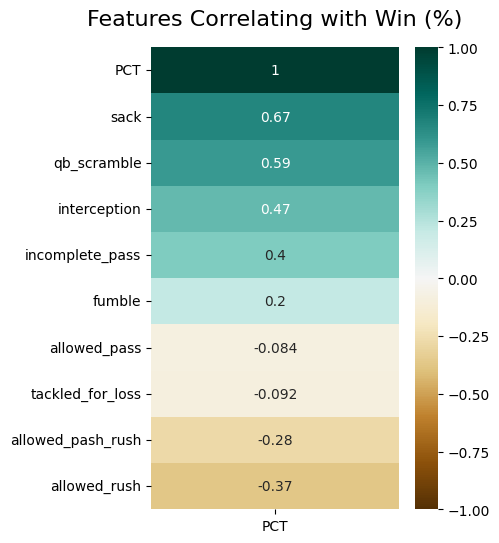

In [204]:
#@title Correlation - Win (%) | double-click here to show/hide the code

import seaborn as sns
import matplotlib.pyplot as plt
win_corr.corr()[['PCT']].sort_values(by='PCT', ascending=False)

plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(win_corr.corr()[['PCT']].sort_values(by='PCT', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Win (%)', fontdict={'fontsize':16}, pad=16);

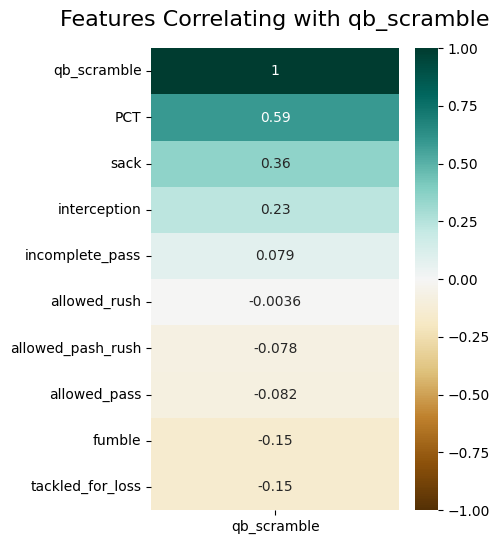

In [205]:
#@title Correlation - qb_scramble | double-click here to show/hide the code


win_corr.corr()[['qb_scramble']].sort_values(by='qb_scramble', ascending=False)

plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(win_corr.corr()[['qb_scramble']].sort_values(by='qb_scramble', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with qb_scramble', fontdict={'fontsize':16}, pad=16);

Overall, the defense causing direct impact on quarterback - **sack** (**0.67**) & **qb scramble** (**0.59**) - and interception (**0.47**) had moderate to strong correlation with **win**. However, **qb scramble** had low to none correlation with **interception** and **incomplete pass**, so it is hard to argue quarterback pressure indicates **win**.

Among allowed pass + rush, pass only, and rush only, **allowed rush** had highest correlation with **loss** (**-0.37**). Even though the magnitude is small, it is noteworthy that allowed rush is a fair indicator of losing the game.  



## 4. Green Bay Packers Defense in Depth

### i. Quarter Pressure Focused

In [206]:
#@title Sack | double-click here to show/hide the code
sack = sack.sort_values(ascending = False)

colors = ['lightgray',] * 32
colors[15] = '#4B92DB'
colors[16] = '#203731'

nums = list(map(str,range(1,33)))

fig = go.Figure(data=[go.Bar(
    x=sack.index,
    y=sack,
    marker_color=colors,
    text = sack,
    textposition = 'auto'
)])

fig.update_layout(
    plot_bgcolor='white'
)
fig.update_layout(title_text='Sack by Defense')

In [207]:
#@title QB Scramble by Defense | double-click here to show/hide the code
qb_scramble = qb_scramble.sort_values(ascending = False)

colors = ['lightgray',] * 32
colors[1] = '#203731'
colors[0] = '#FB4F14'


fig = go.Figure(data=[go.Bar(
    x=qb_scramble.index,
    y=qb_scramble,
    marker_color=colors,
    text = qb_scramble,
    textposition = 'auto'
)])

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_layout(title_text='QB Scramble by Defense')

In [208]:
#@title Interception | double-click here to show/hide the code
interception = interception.sort_values(ascending = False)

colors = ['lightgray',] * 32
colors[30] = '#203731'

nums = list(map(str,range(1,33)))

fig = go.Figure(data=[go.Bar(
    x=interception.index,
    y=interception,
    marker_color=colors,
    text = interception,
    textposition = 'auto'
)])

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_traces(texttemplate = nums, textposition = 'outside')
fig.update_layout(title_text='Interception by Defense')

In [209]:
#@title AVG Rush Allowed Given QB Scramble | double-click here to show/hide the code

temp = pbp_clean.loc[pbp_clean['qb_scramble'] == 1]
temp = temp.loc[temp['play_type'] == 'run']
allowed_ryds_qbs = temp.groupby(['defteam'])['yards_gained'].mean().round(1)
allowed_ryds_qbs = allowed_ryds_qbs.sort_values(ascending = True)

colors = ['lightgray',] * 32
colors[19] = '#203731'
colors[20] = '#0080C6'


fig = go.Figure(data=[go.Bar(
    x=allowed_ryds_qbs.index,
    y=allowed_ryds_qbs,
    marker_color=colors,
    text = allowed_ryds_qbs,
    textposition = 'auto'
)])

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_layout(title_text='Average Rush YDs Allowed Given QB scramble')

Defense Rank by Green Bay (number):
- Sack: T-16/32(45)
- QB Scramble: T-1/32 (46)
- Interception: 31/32 (7)
- AVG Rush Yards Allowed Given QB scramble: T-20/32 (7.4 yds)

The Green Bay Packers Defense did a phenomenal job in bringing pressure to quarterback. They ranked #**1** making opponent **quarterback** **scramble**. However, the pressure did not lead to positive results. First, **Sack** was just about **average**. Second, **Interception** was almost the **lowest** from the league. Third, the average rushing yards allowed given QB scramble was below average. These statistics indicate that the Green Bay Packers Defense could not "seal the deal" after putting initial pressure on QB.


### ii. Break Down by Down

In [210]:
#@title GB -  Rush Yard vs. To Go | double-click here to show/hide the code

# allowed run length (bar chart)
gb_r = gb[gb['play_type'] == 'run']
gb_r['allowed_more_than_to_go'] = gb_r['ydstogo'] < gb_r['yards_gained']

gb_r = gb_r.drop(gb_r[gb_r['down'] == 0].index)

fig = px.scatter(gb_r,
                 x = "yards_gained",
                 y = "ydstogo",
                 color = 'allowed_more_than_to_go',
                 color_discrete_sequence=['#203731','#FFB612'],
                 marginal_x = "histogram",
                 labels={
                     "yards_gained": "Rush Allowed (yd)",
                     "ydstogo": "To Go (yd)",
                 },
                 title = "GB - Rush Allowed vs. To Go")
fig.update_layout(
    plot_bgcolor = 'white'
)
fig.update_xaxes(
    linecolor = 'black',
    gridcolor = 'lightgrey',
    range = [-15,50],
    dtick = 5
)
fig.update_yaxes(
    gridcolor = 'lightgrey'
)

fig.show()

<ipython-input-210-2fea098c05b9>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [211]:
#@title GB -  Rush Allowed by Down | double-click here to show/hide the code

fig = px.box(gb_r,
                 x = "down",
                 y = "yards_gained",
                 color = 'allowed_more_than_to_go',
                 color_discrete_sequence=['#203731','#FFB612'],
                 labels={
                     "yards_gained": "Rush Allowed (yd)",
                     'down': 'Down'
                 },
                 title = "GB - Rush Allowed by Down"
)
fig.update_layout(
    plot_bgcolor = 'white'
)

fig.update_yaxes(
    linecolor = 'lightgrey',
    range = [-15,50],
    dtick = 5
)
fig.update_xaxes(
    linecolor = 'lightgrey'
)

fig.show()


In [212]:
# @title Top Five Defense vs. Packers YDS Allowed by Down | double-click here to Show/Hide Code

top = ['CLE','KC','NYJ','CAR','DAL','GB']
avg_yds_d = pbp_clean[pbp_clean['defteam'].isin(top)]
avg_yds_d = avg_yds_d[avg_yds_d['play_type'] == 'run']
avg_yds_d = avg_yds_d[avg_yds_d['down'] != 0 ]
avg_yds_d = avg_yds_d.groupby(['defteam','down'])['yards_gained'].mean().round(1)
avg_yds_d = avg_yds_d.reset_index()
avg_yds_d

fig = px.line(avg_yds_d,
                 x = "down",
                 y = "yards_gained",
                 color = 'defteam',
                 color_discrete_sequence=['lightgrey','lightgrey','lightgrey',
                                          '#FFB612','lightgrey','lightgrey'],
                 labels={
                     "yards_gained": "Rush Allowed (yd)",
                     'down': 'Down'
                 },
                 title = "TOP 5 Defense vs. GB AVG rush by Down (yd)"
)
fig.update_layout(
    plot_bgcolor = 'white'
)

fig.update_xaxes(
    linecolor = 'lightgrey',
    gridcolor = 'lightgrey',
    range = [0.95,4.05],
    dtick = 1
)

fig.show()


In [213]:
# @title Rush AVG Yards Allowed - first down | double-click here to Show/Hide Code

avg_yds_1 = pbp_clean[pbp_clean['play_type'] == 'run']
avg_yds_1 = avg_yds_1[avg_yds_1['down'] == 1 ]
avg_yds_1 = avg_yds_1.groupby('defteam')['yards_gained'].mean().round(1)
avg_yds_1 = avg_yds_1.sort_values(ascending = False)

colors = ['lightgray',] * 32
colors[7] = '#003594'
colors[8] = '#203731'

nums = list(map(str,range(1,33)))

fig = go.Figure(data=[go.Bar(
    x=avg_yds_1.index,
    y=avg_yds_1,
    marker_color=colors,
    text = avg_yds_1,
    textposition = 'auto'
)])

fig.update_layout(
    plot_bgcolor='white'
)
fig.update_layout(title_text='Rush AVG Yards Allowed - first down')

In [214]:
# @title Rush AVG Yards Allowed - third down | double-click here to Show/Hide Code

avg_yds_3 = pbp_clean[pbp_clean['play_type'] == 'run']
avg_yds_3 = avg_yds_3[avg_yds_3['down'] == 3 ]
avg_yds_3 = avg_yds_3.groupby('defteam')['yards_gained'].mean().round(1)
avg_yds_3 = avg_yds_3.sort_values(ascending = False)

colors = ['lightgray',] * 32
colors[2] = '#203731'

nums = list(map(str,range(1,33)))

fig = go.Figure(data=[go.Bar(
    x=avg_yds_3.index,
    y=avg_yds_3,
    marker_color=colors,
    text = avg_yds_3,
    textposition = 'auto'
)])

fig.update_layout(
    plot_bgcolor='white'
)
fig.update_layout(title_text='Rush AVG Yards Allowed - third down')

From the graphs and table, we could gain three insights:
- Packers Run Defense allowed too much yards on first down (T-8/32, 4.7 yds)
- Packers Run Defense allowed even more yards on third down (3/32, 5.7 yds)
- When allowed more than yards to go, Packers Defense lost big (long tail on first down yards allowed from box plot)

The results could be, again, from 3-4 defense structure and seat back for the first and third down situation. Even with 3-4 defense, one can run good run defense. However, anticipating pass game on first and third down (or by being more "conservative"), the defense was not able to make quick first hit.


### iii. Weak/Strong Spot on Defense

In [220]:

#@title All  -  AVG allowed Yds by run location and gap | double-click here to show/hide the code

all_loc = pbp_clean[pbp_clean['run_location'] != 0]
all_loc = all_loc.groupby(['run_location','run_gap'])['yards_gained'].mean().round(1)
all_loc = all_loc.reset_index()
all_loc["run_gap"] = all_loc['run_gap'].replace(0,'0')
all_loc["location_gap"] = all_loc["run_location"] + ' '+ all_loc["run_gap"]
all_loc = all_loc[all_loc['location_gap'] != 'right 0']



colors = ['grey'] * 7

nums = list(map(str,range(1,33)))

fig = px.bar(all_loc,
             x = 'location_gap',
             y = 'yards_gained',
             labels={
                     "location_gap": "Location Gap",
                     'yards_gained': 'AVG allowed Rush Yards'
                 },
                 title = "AVG allowed Rush Yards by Location and Gap"
             )

fig.update_traces(marker_color = 'grey', marker_line_color = 'black',
                  marker_line_width = 2, opacity = 1)

fig.update_xaxes(categoryorder='array',
                 categoryarray= ['left end', 'left tackle', 'left guard',
                                 'middle 0', 'right guard', 'right tackle',
                                 'right end'])


fig.update_layout(
    plot_bgcolor='white'
)
fig.show()

In [215]:
#@title GB -  AVG allowed Yds by run location and gap | double-click here to show/hide the code
# run_location
gb_loc = gb_r[gb_r['run_location'] != 0]
gb_loc = gb_loc.groupby(['run_location','run_gap'])['yards_gained'].mean().round(1)
gb_loc = gb_loc.reset_index()
gb_loc["run_gap"] = gb_loc['run_gap'].replace(0,'0')
gb_loc["location_gap"] = gb_loc["run_location"] + ' '+ gb_loc["run_gap"]


colors = ['#203731'] * 7

nums = list(map(str,range(1,33)))

fig = px.bar(gb_loc,
             x = 'location_gap',
             y = 'yards_gained',
             labels={
                     "location_gap": "Location Gap",
                     'yards_gained': 'AVG allowed Rush Yards'
                 },
                 title = "GB - AVG allowed Rush Yards by Location and Gap"
             )

fig.update_traces(marker_color = '#203731', marker_line_color = 'black',
                  marker_line_width = 2, opacity = 1)

fig.update_xaxes(categoryorder='array',
                 categoryarray= ['left end', 'left tackle', 'left guard',
                                 'middle 0', 'right guard', 'right tackle',
                                 'right end'])


fig.update_layout(
    plot_bgcolor='white'
)
fig.show()

Unlike general trend, Packers allowed run through the gap by left guard and right tackle. The trend shows higher average yards allowed by left side (on offense view).

## 5. Summary

Overall, the Green Bay Packers Run defense could develope by:
- Seal the deal: after brinigng the pressure on QB, the play should lead to more sack, yards lost, or incomplete.
- Aggressive on first and third down: instead of sitting back line backers to stop short-mid pass game, utilize them to bring faster initial contact and let them help edges to complete their sacks.
- Close the Gap by left guard and right tackle (on Offense view): using 4-3 might help in this case. By having more lineman, the defense can win the leverage easier and close the gap early.

If there more data such as time it took for a defensive team to complete a tackle, the analysis would be more sound.  